In [1]:
%matplotlib inline
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skan import skeleton_to_csgraph, _testdata, draw, Skeleton, summarize

sys.path.insert(0, os.path.abspath('../'))
from src.lib import centroids as centutils

plt.rcParams['figure.figsize'] = [15, 15]

/home/juanjo/VirtualEnvs/Fondef/lib/python3.8/site-packages/skan/csr.py:21: NumbaDeprecationWarning: The 'numba.jitclass' decorator has moved to 'numba.experimental.jitclass' to better reflect the experimental nature of the functionality. Please update your imports to accommodate this change and see http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#change-of-jitclass-location for the time frame.
  @numba.jitclass(csr_spec)


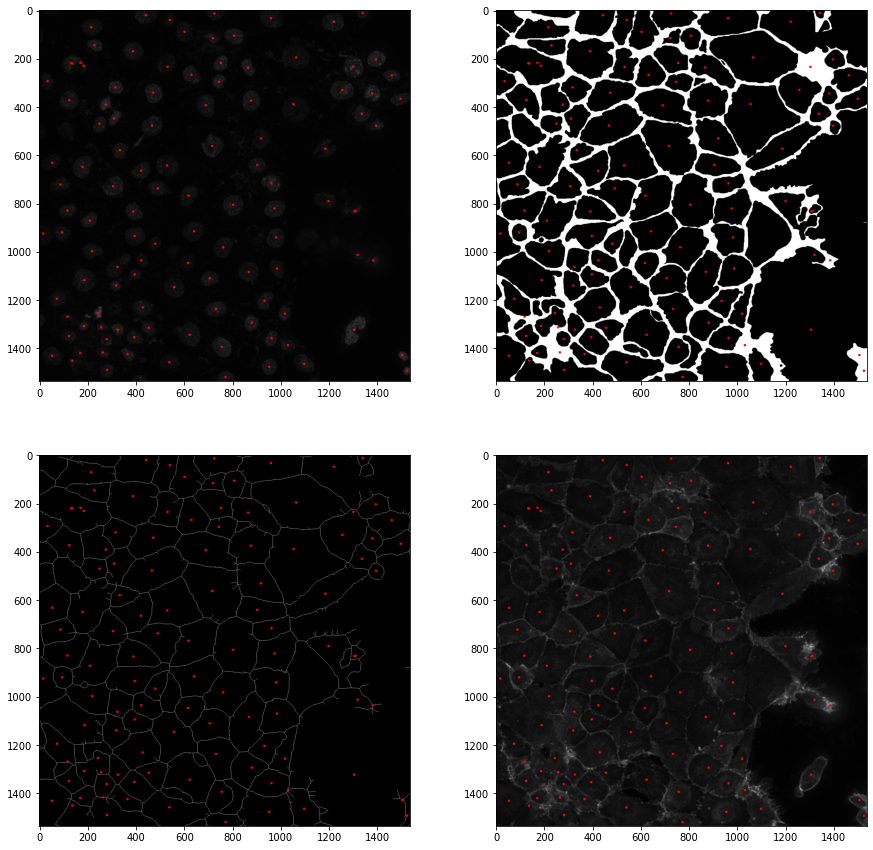

In [2]:
nuclei_path = '../data/AKT1_B1_CAn.tif'
jbin_path = '../data/AKT1_B1_CAj-BI.tif'
jsk_path = '../data/AKT1_B1_CAj-SK.tif'
j_path = '../data/AKT1_B1_CAj.tif'

nuclei_img = cv2.imread(nuclei_path)
jbin_img = cv2.imread(jbin_path)
jsk_img = cv2.imread(jsk_path)
j_img = cv2.imread(j_path)

centroids = centutils.get_nuclei_centroids(nuclei_img)

nuclei_centroids = nuclei_img.copy()
jbin_centroids = jbin_img.copy()
jsk_centroids = jsk_img.copy()
j_centroids = j_img.copy()


for x, y in centroids:
    cv2.circle(nuclei_centroids, (x, y), 5, (255, 0, 0), -1)
    cv2.circle(jbin_centroids, (x, y), 5, (255, 0, 0), -1)
    cv2.circle(jsk_centroids, (x, y), 5, (255, 0, 0), -1)
    cv2.circle(j_centroids, (x, y), 5, (255, 0, 0), -1)

    
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(nuclei_centroids)
ax[0,1].imshow(jbin_centroids)
ax[1,0].imshow(jsk_centroids)
ax[1,1].imshow(j_centroids)



In [34]:
jsk_img_gray = cv2.cvtColor(jsk_img, cv2.COLOR_BGR2GRAY)

pixel_graph, coordinates, degrees = skeleton_to_csgraph(jsk_img_gray)

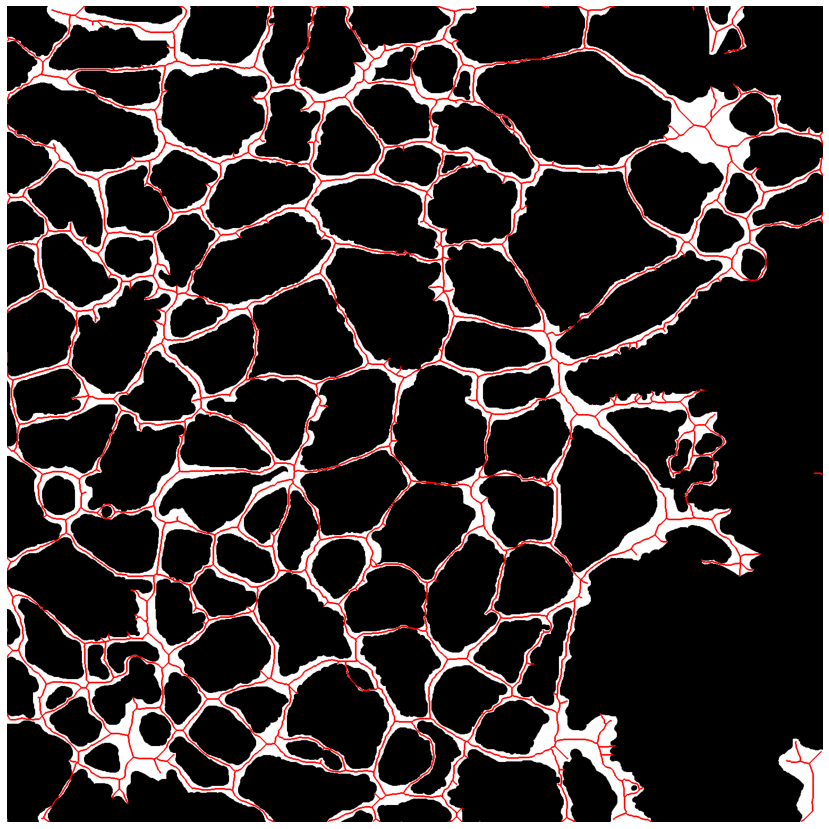

In [33]:
fig, ax = plt.subplots()
draw.overlay_skeleton_2d(jbin_img, jsk_img_gray, dilate=1, axes=ax);

In [32]:
pixel_graph, coordinates, degrees

(<30052x30052 sparse matrix of type '<class 'numpy.float64'>'
 	with 58536 stored elements in Compressed Sparse Row format>,
 array([[   0.,    0.],
        [   0.,  145.],
        [   0.,  146.],
        ...,
        [1535.,  890.],
        [1535., 1212.],
        [1535., 1213.]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [2, 0, 0, ..., 0, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]]))

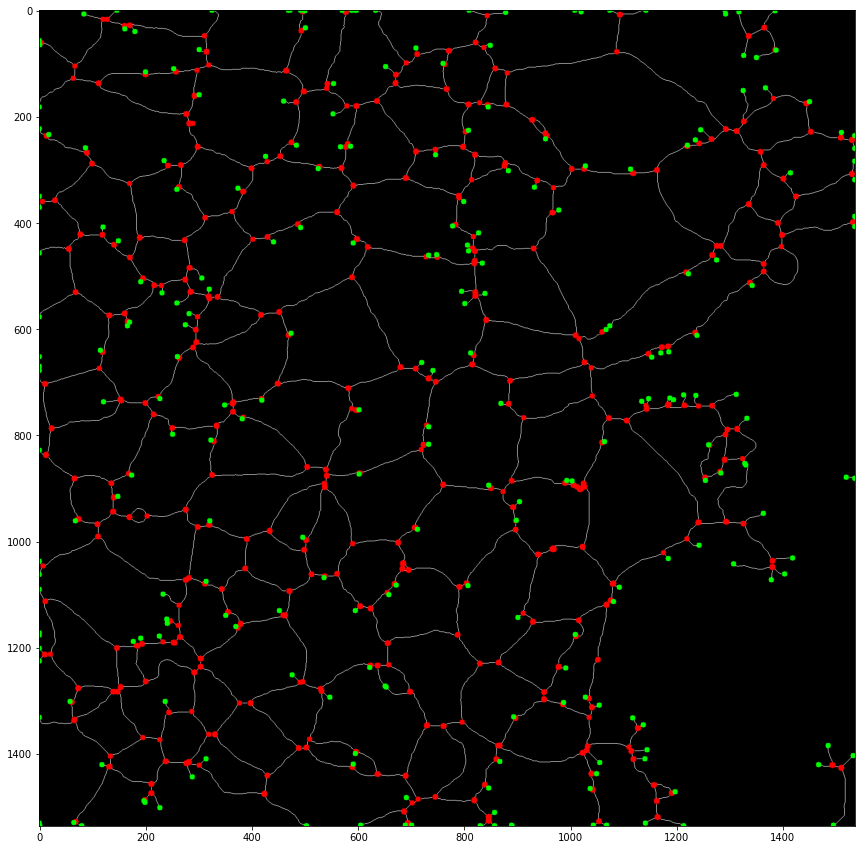

In [67]:
import cv2
gt_2 = np.where(degrees > 2)
eq_1 = np.where(degrees == 1)

degrees2 = np.copy(degrees).astype('uint8')
degrees2[degrees == 0] = 0
degrees2[degrees == 2] = 255
degrees2 = cv2.cvtColor(degrees2, cv2.COLOR_GRAY2RGB)

for index in range(len(gt_2[0])):
    y, x = gt_2[0][index], gt_2[1][index]
    cv2.circle(degrees2, (x, y), 5, (255, 0, 0), -1)

for index in range(len(eq_1[0])):
    y, x = eq_1[0][index], eq_1[1][index]
    cv2.circle(degrees2, (x, y), 5, (0, 255, 0), -1)

plt.imshow(degrees2)

In [85]:
len(degrees), degrees[gt_2].max(), degrees[gt_2].mean(), degrees[gt_2].std()

(1536, 5, 3.143194335169158, 0.3613274666536035)

In [18]:
list(zip(x))

[(array([   0,    0,    0, ..., 1535, 1535, 1535]),),
 (array([ 145,  146,  325, ...,  890, 1212, 1213]),)]

In [68]:
branch_data = summarize(Skeleton(jsk_img_gray))
branch_data.head()

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,1,2,252,25.041631,1,1.0,0.0,0.0,146.0,17.00,128.0,0.0,146.0,17.00,128.0,24.758837
1,1,3,369,66.669048,1,1.0,0.0,0.0,325.0,48.00,311.0,0.0,325.0,48.00,311.0,50.000000
2,3,7,10,3.000000,0,1.0,0.0,0.0,469.0,0.00,472.0,0.0,469.0,0.00,472.0,3.000000
3,1,11,104,5.242641,1,1.0,0.0,0.0,492.0,3.00,496.0,0.0,492.0,3.00,496.0,5.000000
4,1,13,105,8.186922,1,1.0,0.0,0.0,570.0,3.25,577.0,0.0,570.0,3.25,577.0,7.717675


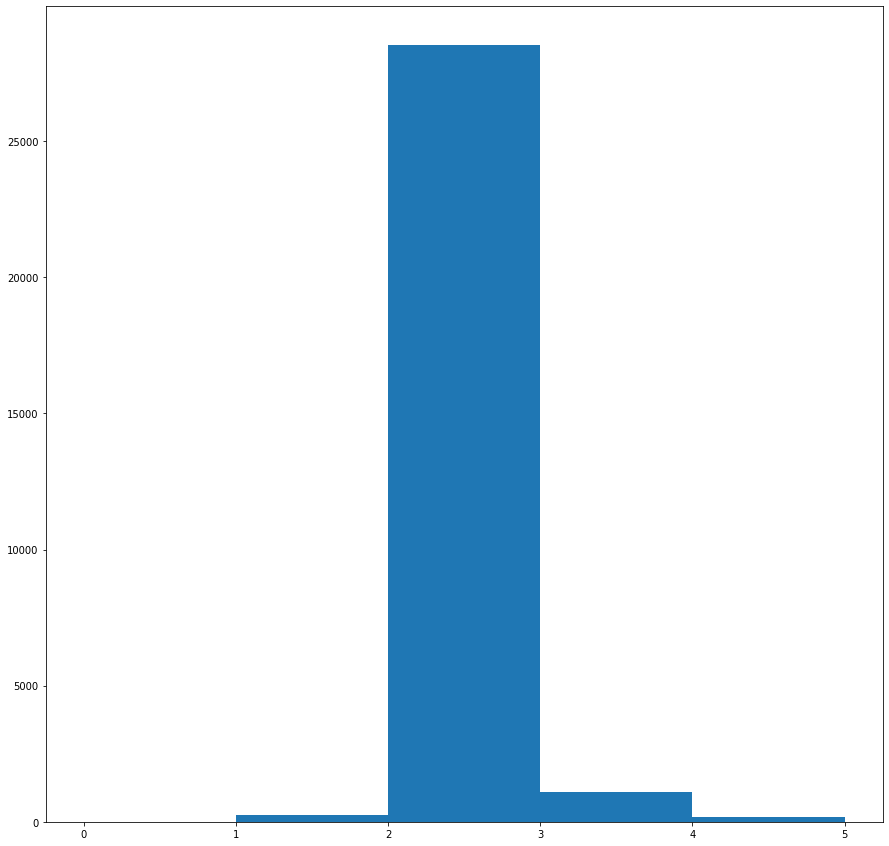

In [20]:
degrees_flat = degrees.flatten()
degrees_cleaned = degrees_flat[degrees_flat != 0]

plt.hist(degrees_cleaned, bins=np.arange(0, np.max(degrees_cleaned) + 1))
plt.show()

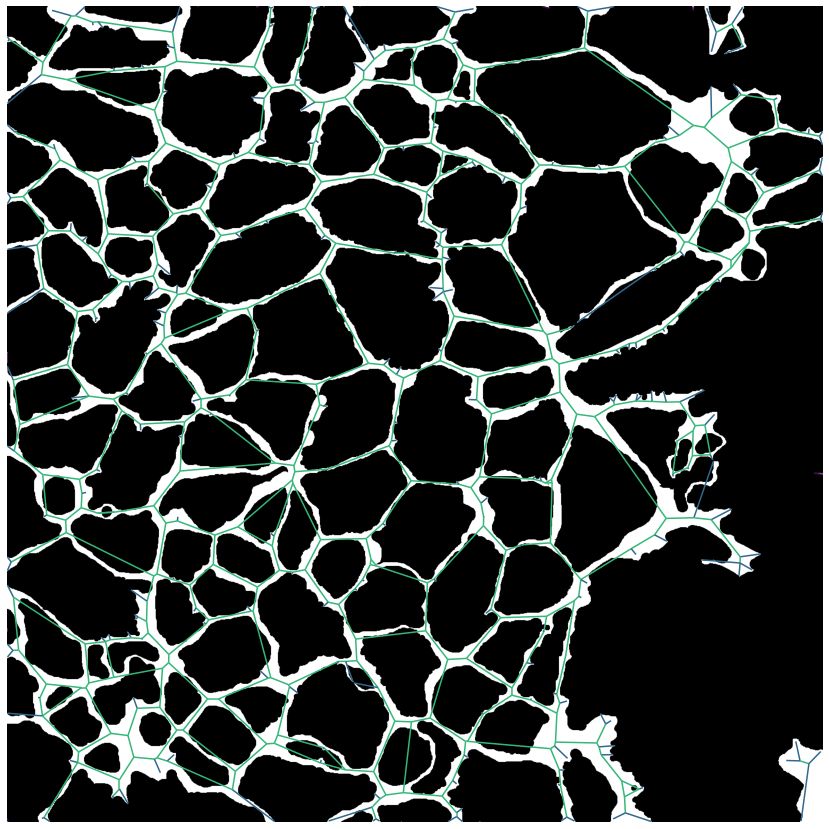

In [127]:
draw.overlay_euclidean_skeleton_2d(jbin_img, branch_data, skeleton_color_source='branch-type')

In [70]:
def draw_lines(df, image, color, thickness=5):
    copy = image.copy()
    for index, row in df.iterrows():
        x0 = int(row['image-coord-src-0'])
        y0 = int(row['image-coord-src-1'])
        x1 = int(row['image-coord-dst-0'])
        y1 = int(row['image-coord-dst-1'])
        cv2.line(copy, (y0, x0), (y1, x1), color, thickness)
    return copy

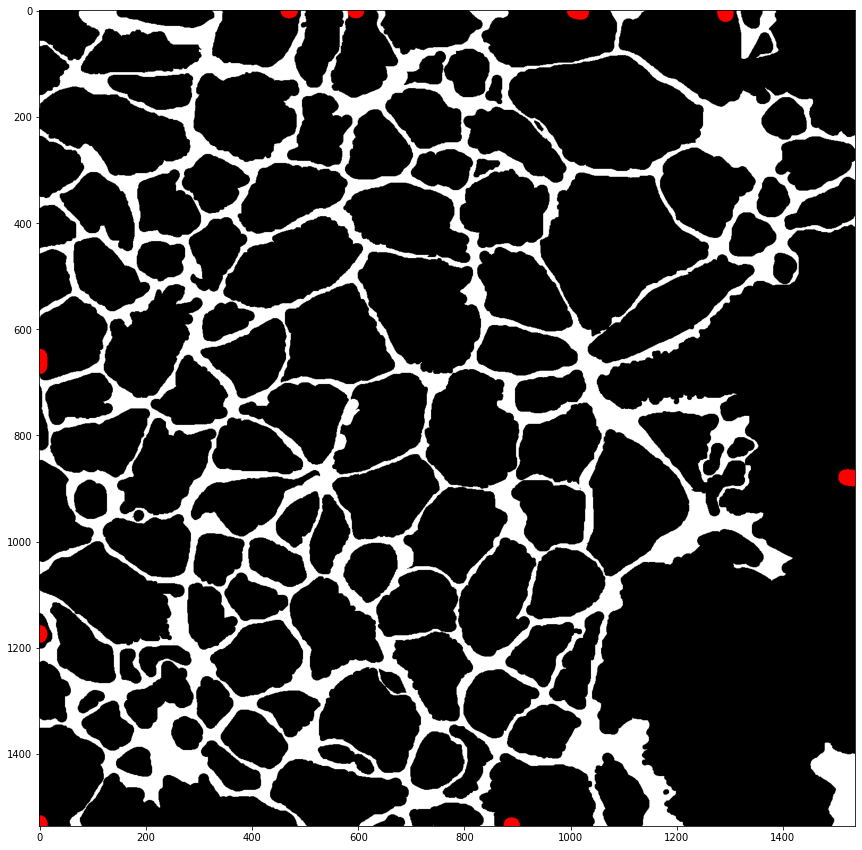

In [132]:
e2e_img = draw_lines(branch_data[branch_data['branch-type'] == 0], jbin_img, (255, 0, 0), 30)
plt.imshow(e2e_img)

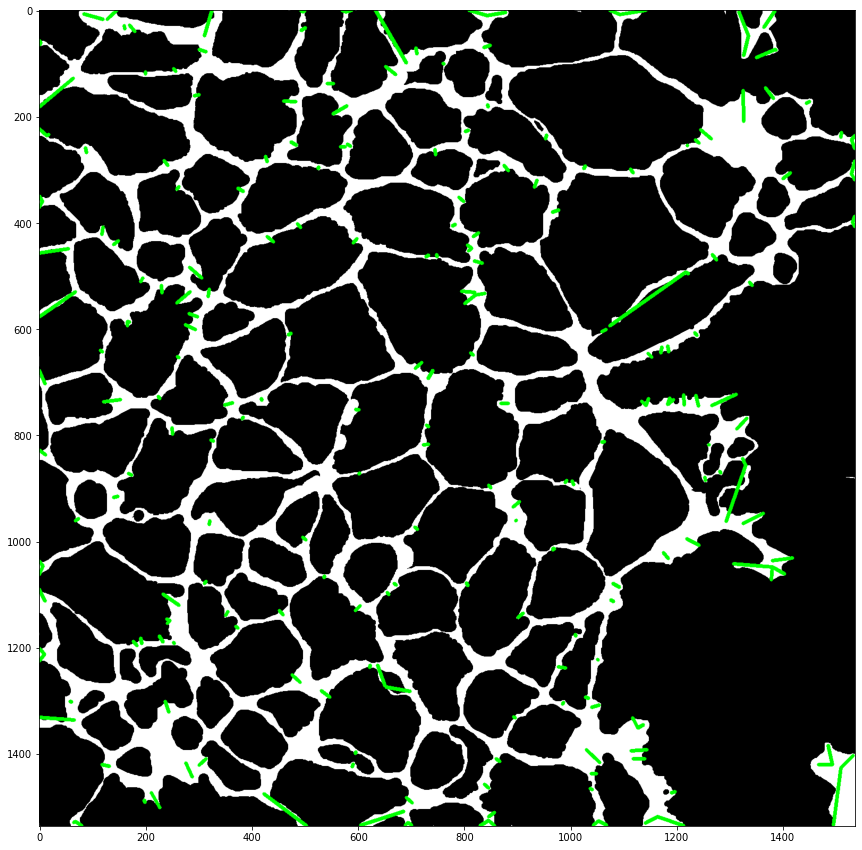

In [133]:
j2e_img = draw_lines(branch_data[branch_data['branch-type'] == 1], jbin_img, (0, 255 , 0))
plt.imshow(j2e_img)

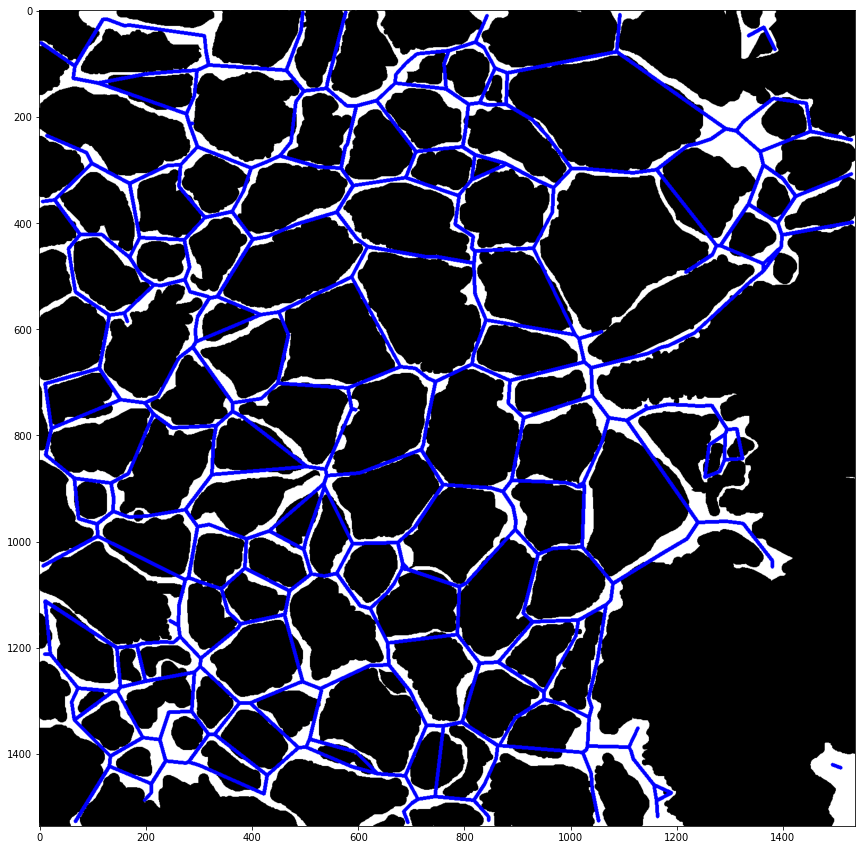

In [134]:
j2j_img = draw_lines(branch_data[branch_data['branch-type'] == 2], jbin_img, (0, 0, 255))
plt.imshow(j2j_img)

In [81]:
j2j_data = branch_data[branch_data['branch-type'] == 2]
(j2j_data['branch-distance'] / j2j_data['euclidean-distance']).mean()


1.0821294369779004

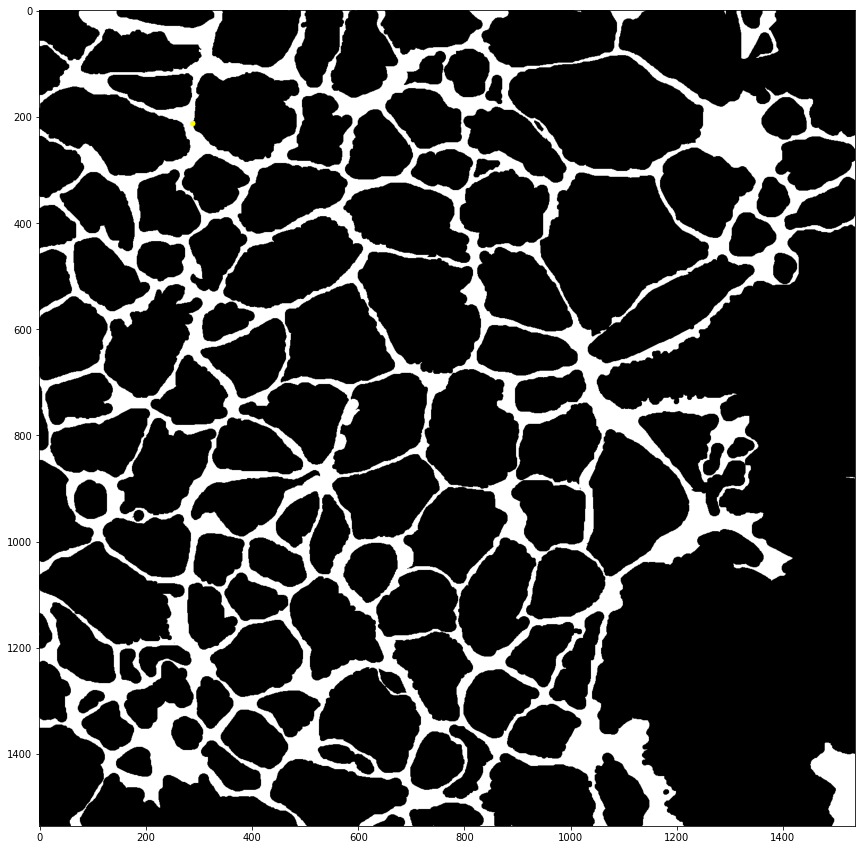

In [72]:
j2e_img = draw_lines(branch_data[branch_data['branch-type'] == 3], jbin_img, (255, 255 , 0), 10)
plt.imshow(j2e_img)

Text(0.5, 1.0, 'Isolated cycles length')

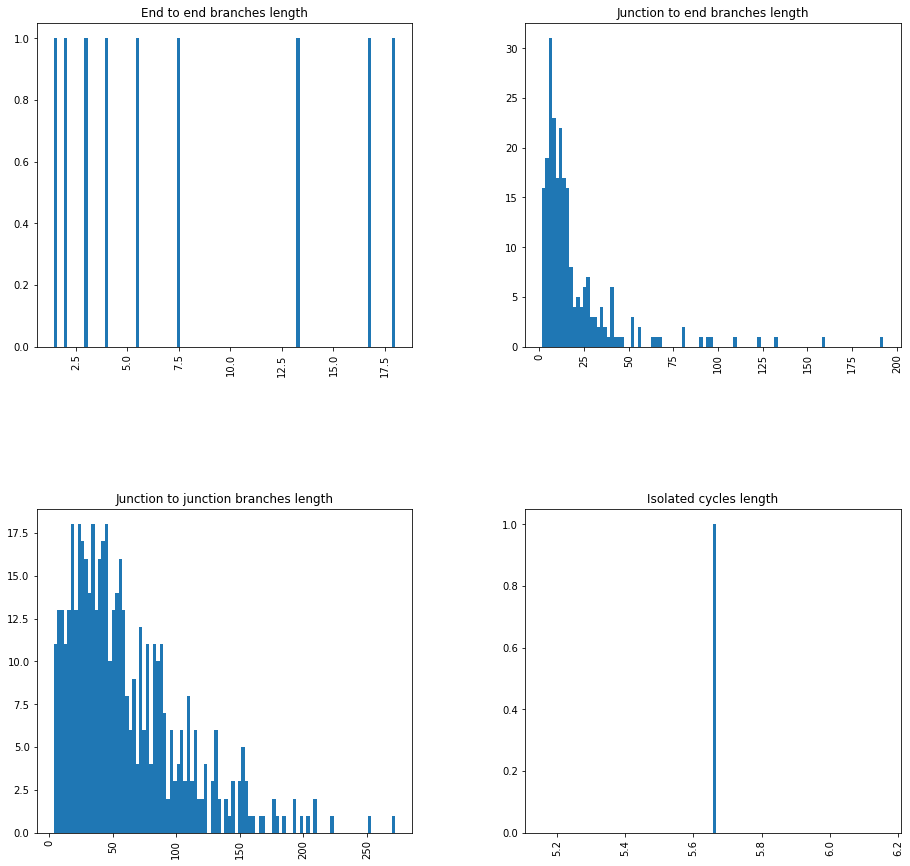

In [136]:
axes = branch_data.hist(column='branch-distance', by='branch-type', bins=100)
axes[0,0].set_title('End to end branches length')
axes[0,1].set_title('Junction to end branches length')
axes[1,0].set_title('Junction to junction branches length')
axes[1,1].set_title('Isolated cycles length')